# Load Dependencies

In [1]:
# data loading dependencies 
import numpy as np
import pandas as pd

# visulaization dependency
import matplotlib.pyplot as plt

# data preprocessing dependencies
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# k-means dependency
from sklearn.cluster import KMeans

# Load Data

In [2]:
# load the Iris dataset
iris = load_iris()

# convert the dataset to a Pandas DataFrame
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])

# print the DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Data Cleaning and Transformation

In [3]:
# remove data points with missing values
df.dropna(inplace=True)

# correct typos in the feature names
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# fill in missing values with the mean value for that feature
df.fillna(df.mean(), inplace=True)

In [5]:
# scale the data using the StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/valid

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [6]:
# reduce the dimensionality of the data to 2 principal components
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
df_pca

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

# Find Optimal Number of Clusters

## Elbow Method

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

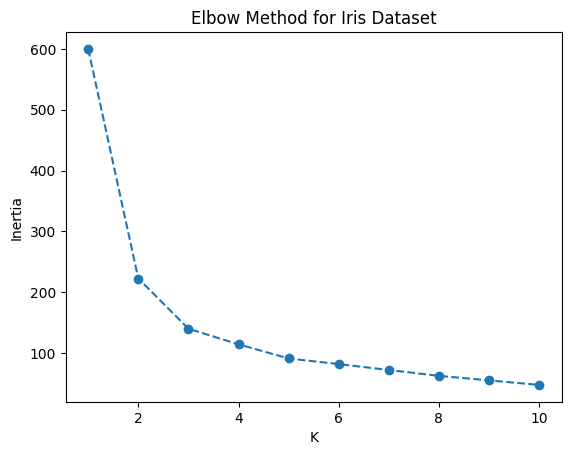

In [7]:
# calculate the inertia (within cluster sum of square) for different values of K
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    inertias.append(kmeans.inertia_)

# plot the inertia vs K
plt.plot(range(1, 11), inertias, marker='o', linestyle='--')
plt.xlabel('K')
plt.ylabel('Inertia')
plt.title('Elbow Method for Iris Dataset')
plt.show()

## Silhouette Scores

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

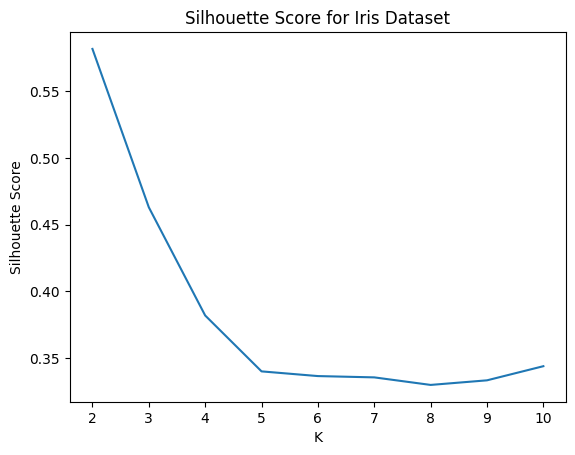

In [8]:
# calculate the silhouette score for different values of K
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_, metric = 'euclidean'))

# plot the silhouette score vs K
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Iris Dataset')
plt.show()

## Gap Statistics

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

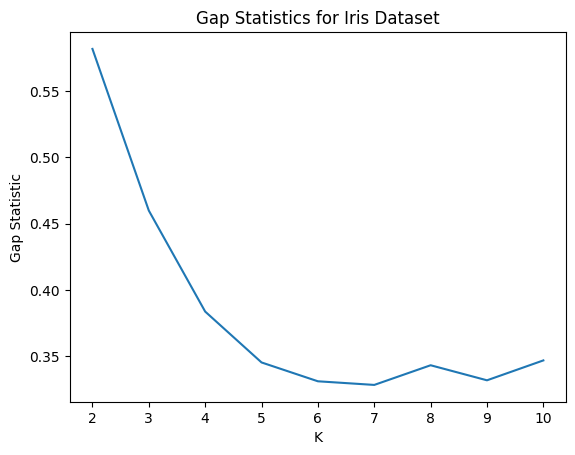

In [9]:
# calculate the gap statistics for different values of K
gap_statistics = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_scaled)
    gap_statistics.append(silhouette_score(df_scaled, kmeans.labels_))

# plot the gap statistics vs K
plt.plot(range(2, 11), gap_statistics)
plt.xlabel('K')
plt.ylabel('Gap Statistic')
plt.title('Gap Statistics for Iris Dataset')
plt.show()

# K-Means Clustering

In [10]:
# initialize the cluster centroids
kmeans = KMeans(n_clusters=3, init='random')

In [11]:
# train the model 
kmeans.fit(df_scaled)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(init='random', n_clusters=3)

# Analyzing Cluster Results

In [12]:
# create a dataframe to analyze results
df_scaled_df = pd.DataFrame(df_scaled)

cluster_labels = kmeans.labels_

## Cluster Analysis

In [13]:
# calculate the mean and standard deviation of each feature for each cluster
cluster_means = df_scaled_df.groupby(cluster_labels).mean()
cluster_stds = df_scaled_df.groupby(cluster_labels).std()

# print the cluster means and standard deviations
print(cluster_means)
print(cluster_stds)

          0         1         2         3
0  1.131405  0.079034  0.985372  0.999088
1 -1.014579  0.853263 -1.304987 -1.254893
2 -0.068817 -0.893400  0.345222  0.284393
          0         1         2         3
0  0.588971  0.600342  0.366447  0.449336
1  0.427104  0.872594  0.098706  0.138721
2  0.476905  0.586514  0.321104  0.413296


## Visualizing Clusters

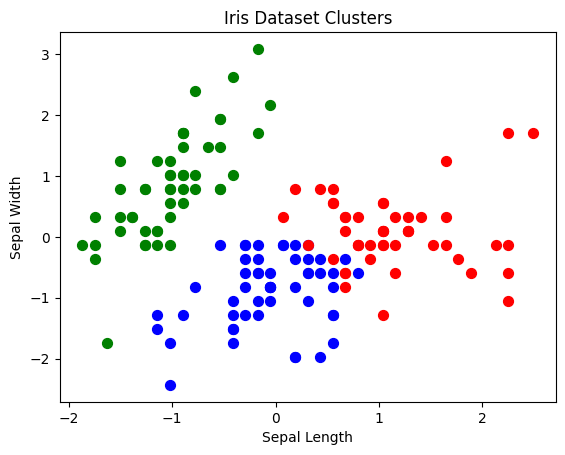

In [14]:
# create a list of colors for each cluster
cluster_colors = ['red', 'green', 'blue']

# plot the data points colored by cluster
for i in range(len(cluster_labels)):
    plt.scatter(df_scaled_df.iloc[i, 0], df_scaled_df.iloc[i, 1], c=cluster_colors[cluster_labels[i]], s=50)

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris Dataset Clusters')
plt.show()

## Evaluation Metrics

In [15]:
# calculate the silhouette score
silhouette_score = silhouette_score(df_scaled, cluster_labels)

# print the silhouette score and the inertia
print('Silhouette score:', silhouette_score)

Silhouette score: 0.45937792074496625
